<a href="https://colab.research.google.com/github/vkodithala/NRG/blob/main/NRG_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.3.5
Training set shape:  (40, 4)
Testing set shape:  (10, 4)


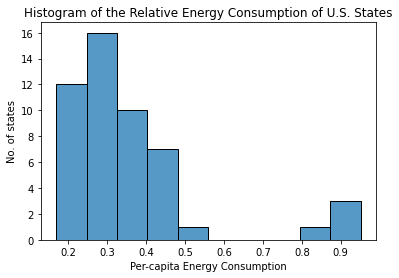

In [99]:
#step 1 = 
import pandas as pd
print(pd.__version__)

#importing .csv dataset from GitHub to Google Colab
url = 'https://raw.githubusercontent.com/vkodithala/NRG/main/Energy%20Census%20and%20Economic%20Data%20US%202010-2014%202.csv?token=GHSAT0AAAAAAB2CFVCG3K5LQAX5YWQIS3Y4Y2O4URA'
df = pd.read_csv(url)
df

#isolating the features pertinent to our project
relevantdf = df[['StateCodes','TotalC2010', 'TotalC2011','TotalC2012','TotalC2013']]
relevantdf = relevantdf[0:51]
relevantdf

#checking which rows are missing values...
df.isnull().sum()

#dropping irrelevant rows (D.C. and US)
df = df.drop(50)
df = df.drop(51)

#creating population and netmig variables to be called later
pop_2010 = df['POPESTIMATE2010']
pop_2011 = df['POPESTIMATE2011']
pop_2012 = df['POPESTIMATE2012']
pop_2013 = df['POPESTIMATE2012']
pop_2014 = df['POPESTIMATE2012']
netmig_2011 = df['RNETMIG2011']
netmig_2012 = df['RNETMIG2012']
netmig_2013 = df['RNETMIG2013']
netmig_2014 = df['RNETMIG2014']


#dropping irrelevant columns - international & domestic migration rates (have net migration rates)
df = df.drop(['State', 'Region', 'Division', 'Coast', 'Great Lakes', 'RINTERNATIONALMIG2011', 'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013', 'RINTERNATIONALMIG2014', 'RDOMESTICMIG2011', 'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014'], axis = 1)

#dropping irrelevant columns - total energy production & expenditures
df = df.drop(['TotalP2010', 'TotalP2011', 'TotalP2012', 'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011', 'TotalE2012', 'TotalE2013', 'TotalE2014'], axis = 1)

#dropping all other columns - only reviewing total energy consumption & comparing it with states' populations, net population change, energy price, and region
n = 158
df.drop(columns = df.columns[-n:], axis = 1, inplace = True)
df

#adding back population and netmig columns
df.insert(loc=7, column='POPESTIMATE2010', value=pop_2010)
df.insert(loc=8, column='POPESTIMATE2011', value=pop_2011)
df.insert(loc=9, column='POPESTIMATE2012', value=pop_2012)
df.insert(loc=10, column='POPESTIMATE2013', value=pop_2013)
df.insert(loc=11, column='POPESTIMATE2014', value=pop_2014)
df.insert(loc=13, column='RNETMIG2011', value=pop_2011)
df.insert(loc=14, column='RNETMIG2012', value=pop_2012)
df.insert(loc=15, column='RNETMIG2013', value=pop_2013)
df.insert(loc=16, column='RNETMIG2014', value=pop_2014)

#adding a column that shows the dominant political party in each state; based on party registration or identification % as of 2020, per https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states
political_party = ['R', 'R', 'R', 'R', 'D', 'D', 'D', 'D', 'R', 'D', 'D', 'R', 'D', 'R', 'D', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'D', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'D','D', 'D', 'R', 'E', 'R']
df.insert(loc=1, column='Dominant_Party', value=political_party)



#converting our cleaned dataset to a .csv file
df.to_csv('clean_NRG_data.csv')
df = pd.read_csv('clean_NRG_data.csv')
df

#importing numpy and ignoring all warning messages
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#creating a column that shows the average per capita energy consumption of all 50 states for the years 2010-2014
df['AverageC_2010.2014'] = (df['TotalC2010'] + df['TotalC2011'] + df['TotalC2012'] + df['TotalC2013'] + df['TotalC2014'])/5
df['AveragePop_2010.2014'] = (df['POPESTIMATE2010'] + df['POPESTIMATE2011'] + df['POPESTIMATE2012'] + df['POPESTIMATE2013'] + df['POPESTIMATE2014'])/5
df['AveragePerCapita_2010.2014'] = (df['AverageC_2010.2014']/df['AveragePop_2010.2014'])

#variable declarations
dataset = df['AveragePerCapita_2010.2014']

#finding the 25th percentile for per capita energy consumption in the years 2010-2014
df_total = dataset
lower_quartile = df_total.quantile(0.25)

#creating a column that shows which states were in the lower quartile for per capita energy consumption for the years 2010-2014
df['efficient'] = 1
df['efficient'].where(dataset <= lower_quartile, 0, inplace=True)

#creating a column that shows which states were in the upper quartile for per capita energy consumption for the years 2010-2014
upper_quartile = df_total.quantile(0.75)
df['inefficient'] = 1
df['inefficient'].where(dataset >= upper_quartile, 0, inplace=True)

#creating a column that shows which states had above avg. efficiency for the years 2010-2014
df['average'] = 1
df['average'].where(dataset < upper_quartile, 0, inplace=True)
df['average'].where(dataset > lower_quartile, 0, inplace=True)
df

#importing matplotlib and seaborn for later usage
import matplotlib.pyplot as plt
import seaborn as sns

#creating a histogram using seaborn
totalc = df['AveragePerCapita_2010.2014']
sns.histplot(totalc).set(xlabel = "Per-capita Energy Consumption", ylabel = "No. of states", title = "Histogram of the Relative Energy Consumption of U.S. States")

#setting up train-test split, not currently being used in the PCA though
from sklearn.model_selection import train_test_split
df_usable = pd.get_dummies(df, columns=['Dominant_Party'])
df_usable = df.drop(columns = ['Dominant_Party', 'StateCodes'])
X = df_usable[['AveragePop_2010.2014', 'TotalPrice2012', 'TotalPrice2013', 'TotalPrice2014']]
y = df_usable['AverageC_2010.2014']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)

#scale the data such that mean = 0 and variance = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
#setting up principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([principal_df, df[['Dominant_Party']]], axis=1)

array([1.00000000e+00, 8.46502748e-13])

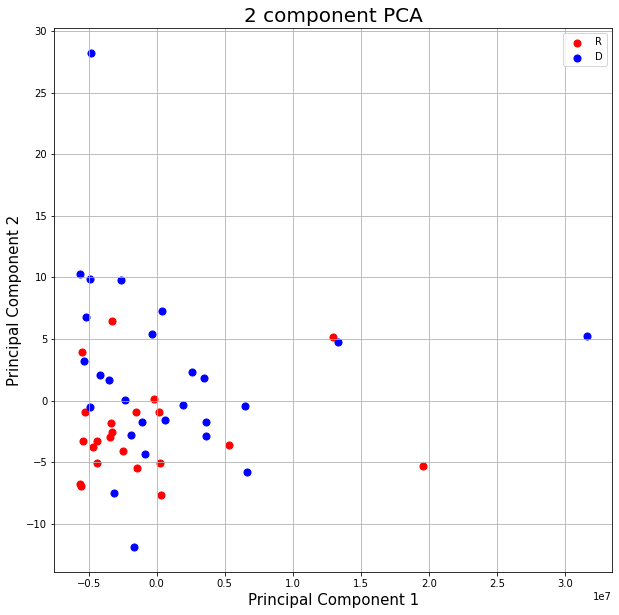

In [121]:
#creating a graph to visualize the PCA
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['R', 'D']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Dominant_Party'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#printing how much information (variance) can be attributed to each of the principal components
pca.explained_variance_ratio_
#99.67% of the information is covered by the PCA

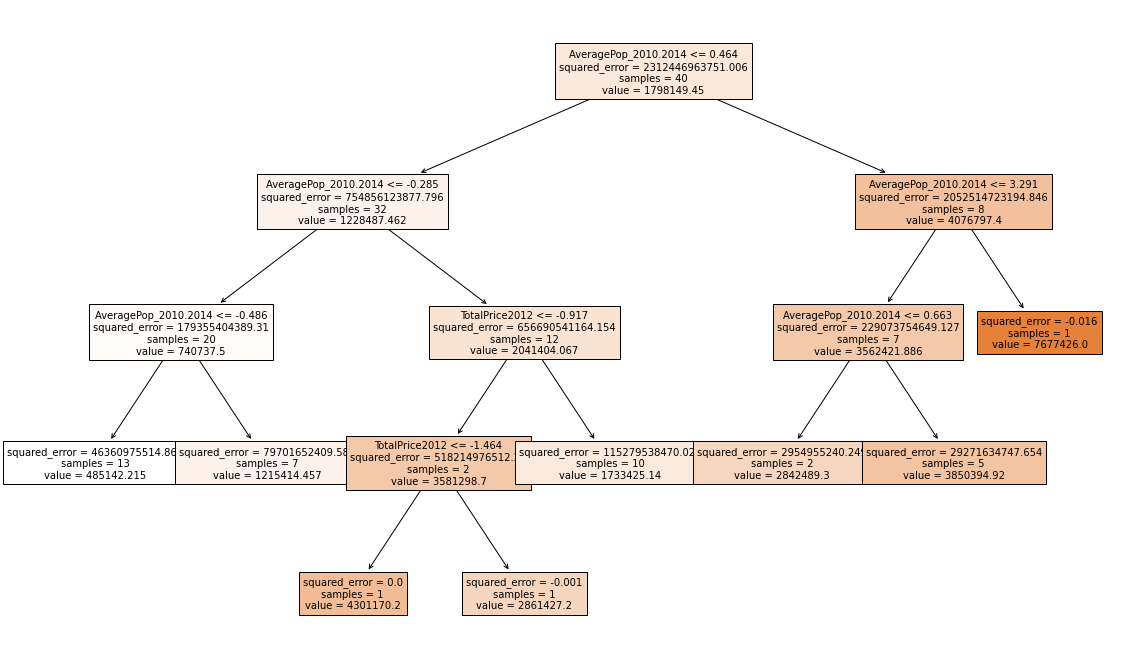

In [106]:
#gini impurity = probability of incorrectly labeling something (we are trying to minimize this)
from sklearn import tree

#decision tree classifier
clf_tree = tree.DecisionTreeRegressor(max_leaf_nodes=8)
clf_tree.fit(X_train, y_train)

plt.figure(figsize = (20,12))
tree.plot_tree(clf_tree, filled=True, fontsize=10, feature_names=['AveragePop_2010.2014', 'TotalPrice2012', 'TotalPrice2013', 'TotalPrice2014'])
plt.show()


Random starting synaptic weights:  [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]]
Outputs after training:  [[0.63668938]
 [0.42128255]
 [0.55650842]
 [0.73985816]
 [0.51927699]
 [0.51672459]
 [0.18159562]
 [0.67945057]
 [0.28325252]
 [0.3104332 ]
 [0.25383283]
 [0.56513283]
 [0.4221632 ]
 [0.70056058]
 [0.65699057]
 [0.26508651]
 [0.6529414 ]
 [0.45173598]
 [0.75289399]
 [0.54292995]
 [0.61501483]
 [0.52665196]
 [0.21915233]
 [0.65834875]
 [0.74512617]
 [0.52769739]
 [0.29379599]
 [0.8397409 ]
 [0.65254214]
 [0.62299551]
 [0.53610145]
 [0.7205691 ]
 [0.614228  ]
 [0.68334475]
 [0.49377028]
 [0.21930044]
 [0.54958126]
 [0.62254275]
 [0.21960248]
 [0.02247707]]
Synaptic weights after training:  [[-2.21740438]
 [-6.60453972]
 [-8.14509111]
 [-7.59683746]]
Outputs after training:  [[9.99998776e-01]
 [1.45675827e-04]
 [9.98922908e-01]
 [1.00000000e+00]
 [6.90835622e-01]
 [9.73667770e-01]
 [1.00809259e-11]
 [9.99999953e-01]
 [7.31938412e-09]
 [2.84906346e-08]
 [4.76096359e-11]


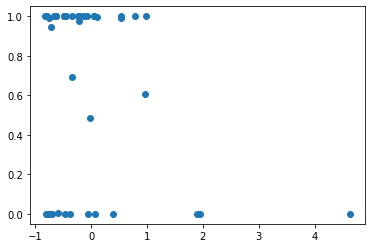

In [175]:
def signoid(x):
  return 1 / (1 + np.exp(-x))

def signoid_derivative(x):
  return x + (1-x)

training_inputs = X_train
training_outputs = y_train[2]
np.random.seed(1)
synaptic_weights = 2 * np.random.random((4,1)) - 1
print('Random starting synaptic weights: ', synaptic_weights)
for iteration in range(100000):
  input_layer = training_inputs
  outputs = signoid(np.dot(input_layer, synaptic_weights))
print('Outputs after training: ', outputs)

#calculating the error of calculated outputs and automatically adjusting synaptic weights
error = outputs - training_outputs
adjustments = error * signoid_derivative(outputs)
synaptic_weights += np.dot(input_layer.T, adjustments)

for iteration in range(100000):
  input_layer = training_inputs
  outputs = signoid(np.dot(input_layer, synaptic_weights))

print('Synaptic weights after training: ', synaptic_weights)
print('Outputs after training: ', outputs)

training_inputs = training_inputs[:,0]

plt.scatter(training_inputs, outputs)
plt.show()
